# Replicating RFNC1 function

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
nk = 70 
rho_1 = 999.5
rho_2 = 1028
rho_3 = 1028.5
drho = 7.
rho_4 = 1037.7
drho_min = 0.0078125

In [3]:
def RFNC1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min):
    rho_target = np.zeros(nk+1)
    nki = nk + 1 - 4 # Number of interfaces minus 4 specified values
    rho_target[0] = rho_1
    rho_target[1] = rho_2
    dx = 0.
    for k in range(nki+1):
        ddx = np.max( [drho_min, (nki-k)/(nki*nki)] )
        dx = dx + ddx
        rho_target[2+k] = rho_3 + (2. * drho) * dx
    rho_target[3+nki] = rho_4
    return rho_target

In [4]:
rho_target_orig = RFNC1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)
rho_target_orig

array([ 999.5       , 1028.        , 1028.70895522, 1028.91479171,
       1029.11750947, 1029.31710849, 1029.51358877, 1029.70695032,
       1029.89719314, 1030.08431722, 1030.26832257, 1030.44920918,
       1030.62697706, 1030.8016262 , 1030.97315661, 1031.14156828,
       1031.30686122, 1031.46903542, 1031.62809089, 1031.78402762,
       1031.93684562, 1032.08654489, 1032.23312542, 1032.37658721,
       1032.51693027, 1032.6541546 , 1032.78826019, 1032.91924705,
       1033.04711517, 1033.17186456, 1033.29349521, 1033.41200713,
       1033.52740031, 1033.63967476, 1033.74904976, 1033.85842476,
       1033.96779976, 1034.07717476, 1034.18654976, 1034.29592476,
       1034.40529976, 1034.51467476, 1034.62404976, 1034.73342476,
       1034.84279976, 1034.95217476, 1035.06154976, 1035.17092476,
       1035.28029976, 1035.38967476, 1035.49904976, 1035.60842476,
       1035.71779976, 1035.82717476, 1035.93654976, 1036.04592476,
       1036.15529976, 1036.26467476, 1036.37404976, 1036.48342

In [5]:
rho_2 = 1033
rho_3 = 1033.7
drho=3
rho_target_new = RFNC1(nk,rho_1,rho_2,rho_3,drho,rho_4,drho_min)
rho_target_new

array([ 999.5       , 1033.        , 1033.78955224, 1033.87776788,
       1033.96464691, 1034.05018935, 1034.13439519, 1034.21726442,
       1034.29879706, 1034.37899309, 1034.45785253, 1034.53537536,
       1034.6115616 , 1034.68641123, 1034.75992426, 1034.83210069,
       1034.90294052, 1034.97244375, 1035.04061038, 1035.10744041,
       1035.17293384, 1035.23709067, 1035.29991089, 1035.36139452,
       1035.42154155, 1035.48035197, 1035.5378258 , 1035.59396302,
       1035.64876364, 1035.70222767, 1035.75435509, 1035.80514591,
       1035.85460013, 1035.90271775, 1035.94959275, 1035.99646775,
       1036.04334275, 1036.09021775, 1036.13709275, 1036.18396775,
       1036.23084275, 1036.27771775, 1036.32459275, 1036.37146775,
       1036.41834275, 1036.46521775, 1036.51209275, 1036.55896775,
       1036.60584275, 1036.65271775, 1036.69959275, 1036.74646775,
       1036.79334275, 1036.84021775, 1036.88709275, 1036.93396775,
       1036.98084275, 1037.02771775, 1037.07459275, 1037.12146

In [44]:
rho_target_newest = rho_target_new[:58]
for i in range(20):
    rho_target_newest = np.append(rho_target_newest,rho_target_newest[-1]+0.02)
rho_target_newest = np.append(rho_target_newest,rho_target_newest[-1]+0.1)
rho_target_newest = np.append(rho_target_newest,rho_target_newest[-1]+0.1)
rho_target_newest

array([ 999.5       , 1033.        , 1033.78955224, 1033.87776788,
       1033.96464691, 1034.05018935, 1034.13439519, 1034.21726442,
       1034.29879706, 1034.37899309, 1034.45785253, 1034.53537536,
       1034.6115616 , 1034.68641123, 1034.75992426, 1034.83210069,
       1034.90294052, 1034.97244375, 1035.04061038, 1035.10744041,
       1035.17293384, 1035.23709067, 1035.29991089, 1035.36139452,
       1035.42154155, 1035.48035197, 1035.5378258 , 1035.59396302,
       1035.64876364, 1035.70222767, 1035.75435509, 1035.80514591,
       1035.85460013, 1035.90271775, 1035.94959275, 1035.99646775,
       1036.04334275, 1036.09021775, 1036.13709275, 1036.18396775,
       1036.23084275, 1036.27771775, 1036.32459275, 1036.37146775,
       1036.41834275, 1036.46521775, 1036.51209275, 1036.55896775,
       1036.60584275, 1036.65271775, 1036.69959275, 1036.74646775,
       1036.79334275, 1036.84021775, 1036.88709275, 1036.93396775,
       1036.98084275, 1037.02771775, 1037.04771775, 1037.06771

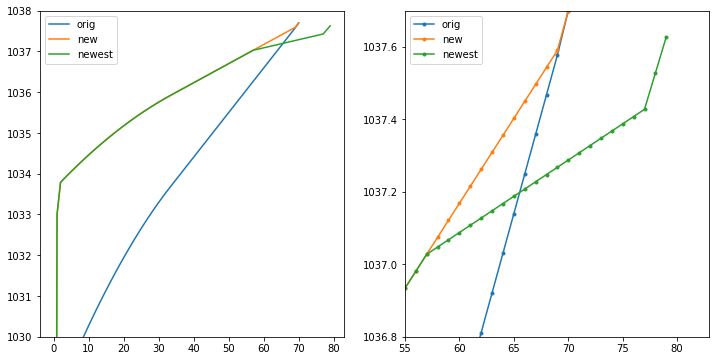

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(rho_target_orig,label='orig')
plt.plot(rho_target_new,label='new')
plt.plot(rho_target_newest,label='newest')
plt.ylim(ymin=1030)
plt.ylim(ymax=1038)
plt.legend()
plt.subplot(122)
plt.plot(rho_target_orig,label='orig',marker='.')
plt.plot(rho_target_new,label='new',marker='.')
plt.plot(rho_target_newest,label='newest',marker='.')
plt.ylim(ymin=1036.8)
plt.ylim(ymax=1037.7)
plt.xlim(xmin=55)
plt.legend()

In [64]:
rho2 = xr.DataArray(rho_target_newest, coords = [np.arange(80).astype('float')], dims = ['nrho'], name = 'rho2', attrs = {'units':'kg m-3'})

In [65]:
rho2.to_netcdf('/g/data/x77/ahg157/inputs/mom6/panan-01/diag_rho2.nc')

In [63]:
np.arange(80).astype('float')

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79.])